In [9]:
import matplotlib.pyplot as plt
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape, Conv2DTranspose, Lambda
from keras.models import Model
from keras.optimizers import RMSprop
from keras.models import model_from_json
import numpy as np

# import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
mnist_train = mnist.train.images
mnist_test = mnist.test.images
mnist_validation = mnist.validation.images


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [10]:
# Model
# Training Parameters
learning_rate = 0.001
num_steps = 100
batch_size = 256

# Network Parameters
num_hidden_1 = 256 # number of parameters in the first fully connected layer in encoder and decoder
num_hidden_2 = 128 # number of parameters in the second fully connected layer in encoder
num_hidden_3 = 3136 # number of parameters in the second fully connected layer in decoder
num_input = 784 # MNIST data input (img shape: 28*28)

# Build computational graph using Keras

X = Input(shape = (28, 28, 1)) # placeholder for input data

enc_conv1 = Conv2D(32, (5, 5), activation='relu', padding='same')(X)
    
enc_pool1 = MaxPooling2D((2, 2), strides = 2, padding='same')(enc_conv1)
        
enc_conv2 = Conv2D(64, (5, 5), activation='relu', padding='same')(enc_pool1)
    
enc_pool2 = MaxPooling2D((2, 2), strides = 2, padding='same')(enc_conv2)
    
enc_flattened = Flatten()(enc_pool2)
    
enc_dense1 = Dense(num_hidden_1, activation = 'relu')(enc_flattened)
        
enc_dense2 = Dense(num_hidden_2, activation = 'sigmoid')(enc_dense1)

enc_dense1 = Dense(num_hidden_1, activation = 'relu')(enc_dense2)
    
enc_dense2 = Dense(num_hidden_3, activation = 'relu')(enc_dense1)
        
enc_dense2 = Reshape((7, 7, 64))(enc_dense2)
        
enc_deconv1 = Conv2DTranspose(64, (5, 5), activation='relu', padding='same', kernel_initializer='glorot_normal')(enc_dense2)
    
enc_upsample1 = UpSampling2D((2, 2))(enc_deconv1)
            
enc_deconv2 = Conv2DTranspose(32, [5, 5], activation='relu', padding='same', kernel_initializer='glorot_normal')(enc_upsample1)
        
enc_upsample2 = UpSampling2D((2, 2))(enc_deconv2)
            
enc_flattened = Flatten()(enc_upsample2)
        
enc_dense3 = Dense(28 * 28, activation = 'sigmoid', kernel_initializer='glorot_normal')(enc_flattened)
        
enc_dense3 = Reshape((28, 28, 1))(enc_dense3)
    
# Autoencoder model  
autoencoder = Model(X, enc_dense3)

# Determine the optimizer and the loss function
opt = RMSprop(lr = 0.001)
autoencoder.compile(optimizer=opt, loss='mean_squared_error')


In [5]:
# Training
mnist_train = np.reshape(mnist_train, (mnist_train.shape[0], 28, 28, 1))
mnist_test = np.reshape(mnist_test, (mnist_test.shape[0], 28, 28, 1))

autoencoder.fit(mnist_train, mnist_train, batch_size, epochs = num_steps, shuffle=True, validation_data=(mnist_test, mnist_test))

# save model
autoencoder.save_weights("model.h5")

Train on 55000 samples, validate on 10000 samples
Epoch 1/100
55000/55000 [==============================] - 19s 344us/step - loss: 0.0614 - val_loss: 0.0405
Epoch 2/100
55000/55000 [==============================] - 17s 317us/step - loss: 0.0351 - val_loss: 0.0316
Epoch 3/100
14592/55000 [======>.......................] - ETA: 12s - loss: 0.029155000/55000 [==============================] - 17s 317us/step - loss: 0.0265 - val_loss: 0.0216
Epoch 4/100
55000/55000 [==============================] - 17s 317us/step - loss: 0.0215 - val_loss: 0.0193
Epoch 5/100
45312/55000 [=======================>......] - ETA: 2s - loss: 0.018855000/55000 [==============================] - 17s 318us/step - loss: 0.0186 - val_loss: 0.0181
Epoch 6/100
55000/55000 [==============================] - 17s 318us/step - loss: 0.0165 - val_loss: 0.0149
Epoch 7/100
52992/55000 [===========================>..] - ETA: 0s - loss: 0.015055000/55000 [==============================] - 17s 317us/step - loss: 0.0150 - val

54528/55000 [============================>.] - ETA: 0s - loss: 0.004455000/55000 [==============================] - 17s 318us/step - loss: 0.0044 - val_loss: 0.0098
Epoch 60/100
55000/55000 [==============================] - 17s 318us/step - loss: 0.0044 - val_loss: 0.0101
Epoch 61/100
54528/55000 [============================>.] - ETA: 0s - loss: 0.004355000/55000 [==============================] - 17s 317us/step - loss: 0.0043 - val_loss: 0.0101
Epoch 62/100
55000/55000 [==============================] - 17s 317us/step - loss: 0.0043 - val_loss: 0.0100
Epoch 63/100
54528/55000 [============================>.] - ETA: 0s - loss: 0.004255000/55000 [==============================] - 17s 318us/step - loss: 0.0042 - val_loss: 0.0099
Epoch 64/100
55000/55000 [==============================] - 17s 317us/step - loss: 0.0042 - val_loss: 0.0101
Epoch 65/100
54528/55000 [============================>.] - ETA: 0s - loss: 0.004255000/55000 [==============================] - 17s 316us/step - loss: 

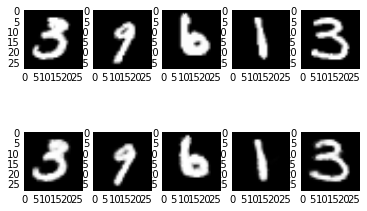

In [13]:
autoencoder.load_weights('model.h5')

# Following commented lines is required when copying saved model in Google Colab to Google Drive. I have trained this model in Google Colab so I keep these code snippets here just incase needed by someone.
#!pip install -U -q PyDrive
#from pydrive.auth import GoogleAuth
#from pydrive.drive import GoogleDrive
#from google.colab import auth
#from oauth2client.client import GoogleCredentials
#auth.authenticate_user()
#gauth = GoogleAuth()
#gauth.credentials = GoogleCredentials.get_application_default()
#drive = GoogleDrive(gauth)
#uploaded = drive.CreateFile({'title': 'model.h5'})
#uploaded.SetContentFile('model.h5')
#uploaded.Upload()
#print('Uploaded file with ID {}'.format(uploaded.get('id')))

# Test  
n = 5 # number of images to test
_, axarr = plt.subplots(2, n) # create axis array to display images
    
# Encode and decode images from test set and visualize their reconstruction.
batch_x, _ = mnist.test.next_batch(n)
batch_x = np.reshape(batch_x, [-1, 28, 28, 1])

g = autoencoder.predict(batch_x) 

for i in range(n):       
    axarr[0, i].imshow(batch_x[i].reshape([28, 28]), origin="upper", cmap="gray")
    axarr[1, i].imshow(g[i].reshape([28, 28]), origin="upper", cmap="gray")